# CUSTOMER DATA PROCESSING

In [1]:
# import for required libraries
import csv
import json

## Functions Declaration

In [2]:
# function to read csv file, convert it and return to dictionary format
def dictionaryReader(csv_file_path = "acw_user_data.csv"):
    try:
        # Opens CSV file
        with open(csv_file_path, "r") as csv_file:
             # Reads CSV file row as dictionary
            reader = csv.DictReader(csv_file) 
            return list(reader) # list here converts dictionary to list of dictionaries
            
    except FileNotFoundError:
        # Returns an error message if file path error
        return "File not found"
    except:
        # Returns an error message if there are any error
        return"An error occured while reading in file"

In [3]:
# function to write dictionary to a json file
def jsonWriter(data, json_file_path):
    try:
        with open(json_file_path, "w") as json_file:
            json.dump(data, json_file, indent = 4)
        return "File written successfully"
    except:
        # Returns an error message if file isnt written successfully
        return "error writting the file to json file"

In [4]:
# funtion to format a dictionary, from a flat structure to a nested rich structure
def jsonFormater(row=[]):
    try:
        return {
            "first_name" : row["First Name"], 
            "last_name" : row["Last Name"],
            "age" : int(row["Age (Years)"]),
            "sex" : row["Sex"],
            "marital_status" : row["Marital Status"],
            "dependants" : row["Dependants"],
            "employer_company" : row["Employer Company"],
            "yearly_pension" : float(row["Yearly Pension (Dollar)"]),
            "yearly_salary" : float(row["Yearly Salary (Dollar)"]),
            "retired" : row["Retired"],
            "distance_commuted_km" : float(row["Distance Commuted to Work (Km)"]),
    
            "address": {
                "address_street" : row["Address Street"],
                "address_city" : row["Address City"],
                "address_postcode" : row["Address Postcode"]
            },
    
            "credit_card": {
                "start_date" : row["Credit Card Start Date"],
                "expiry_date" : row["Credit Card Expiry Date"],
                "card_number" : row["Credit Card Number"],
                "security_number" : row["Credit Card CVV"],
                "iban" : row["Bank IBAN"],
            },
    
            "vehicle": {
                 "make" : row["Vehicle Make"],
                 "model" : row["Vehicle Model"],
                 "year" : row["Vehicle Year"],
                 "type" : row["Vehicle Type"]
            }
         }
    except:
        # Returns an error message if there are any error
        return "An error has occured"

In [5]:
def jsonReader(json_file_path = "processed.json"):
    try:
        with open (json_file_path, "r") as json_file:
            return json.load(json_file)
            
    except FileNotFoundError:
        # Returns an error message if file path error
        return "File not found"
    except:
         # Returns an error message if there are any error
        return "An error has occured"

In [6]:
# use defined function to read csv to dictionary
csv_reader = dictionaryReader()

## Solution 1

Reading in the provided ACW Data using the CSV library.

In [7]:
# Path to the csv user file
csv_file_path = "acw_user_data.csv"

## Solution 2

Converting the actual data from all flat structures into nested structures.

In [8]:
# Replaces the name of the CSV file
json_file_path = csv_file_path.replace(".csv", "_nested.json") 
result = [] # Creates an empty list to store person data
# itereates through the rows
for row in csv_reader:

     # Creates a list that embodies dictionaries, getting their keys and values
     person_data = jsonFormater(row)

     # Puts the data in the defined result list
     result.append(person_data)

jsonWriter(result, json_file_path) # call our defined function with the defined json_file_path argument

'File written successfully'

## Solution 3

Due to the difficulty encountered, as a result of errors, of which the client has informed me as well, a new list will be created beleow to correct all of such error.

In [9]:
# Creates two empty list
missing_dependants_rows = []
corrected_dependants_rows = []

csv_reader = dictionaryReader(csv_file_path) # calls defined function to read in csv to dictionary
header_column = csv_reader[0].keys() # Gets column headers

# iterates through the rows
for i, row in enumerate(csv_reader):
    # Checks through dependant column
    dependants = row.get("Dependants", "").strip()

    # Replaces error rows wih N/A
    if dependants == "":
        row["Dependants"] = "N/A"

        # Omits row 1 cause its the header row
        missing_dependants_rows.append(i + 2)

    # Puts the data in the empty corrected list    
    corrected_dependants_rows.append(row)

print(f"missing_dependants_rows: {missing_dependants_rows}")

missing_dependants_rows: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]


## Solution 4

A new record will be written into a processed.json file in the JSON data format.

In [10]:
# Output file
json_file_path = "processed.json"

# Opens CSV file
with open(csv_file_path, "r") as csv_file:
    # Reads CSV file row as dictionary
    csv_reader = csv.DictReader(csv_file)
    # Creates an empty list to store person data
    result = []

    # itereates through the rows
    for row in corrected_dependants_rows:

         # Uses defined jsonFormater to format record to the defined json structure
         person_data = jsonFormater(row)
         # Puts the data in the empty list
         result.append(person_data)
        
# call our defined function with the defined json_file_path argument
jsonWriter(result, json_file_path)

'File written successfully'

## Solution 5

Two additional file outputs will be created for the retired customers(retired.json) and the employed customers(employed.json).

In [11]:
# Filtered empty lists
retired_customers = []
employed_customers = []

# Opens CSV file
with open(csv_file_path, "r") as csv_file:
    # Reads CSV file
    csv_reader = csv.DictReader(csv_file)

    # itereates through the rows
    for row in csv_reader:

         # Creates a list that embodies dictionaries, getting their keys and values
         person_data = jsonFormater(row) # using defined jsonFormater to format record to the defined json structure


         # Adds person to the retired customers if True
         if row["Retired"] == "True":
            retired_customers.append(person_data) 

         # Adds peron to the employed customers if N/A
         if row["Employer Company"] != "N/A":
            employed_customers.append(person_data)


# call our defined function with the defined json_file_path argument and write data into retired.json.json
jsonWriter(retired_customers, "retired.json")  

# call our defined function with the defined json_file_path argument and write data into employed.json.json
jsonWriter(employed_customers, "employed.json")

'File written successfully'

## Solution 6

Data of customers who have more than 10 years between their start and end date, seperated and stored on a remove_ccard.json file.

In [12]:
# Gets the cards star date and end date
def ccards_validity(row):
    start = row["Credit Card Start Date"]
    end = row["Credit Card Expiry Date"]

    # Splits the starting and ending date and year by removing the slash / sign
    start_month, start_year = start.split("/")
    end_month, end_year = end.split("/")

    # Chnages month and year from text o number 
    start_month = int(start_month)
    end_month = int(end_month)

    # Simple math addition that changes from two int to four to make it look like actual year i.e from 12 to 2012
    start_year = int(start_year) + 2000
    end_year = int(end_year) + 2000


    # Calculates the months between the star and end date
    total_months = (end_year - start_year) * 12 +(end_month - start_month)

    # returns true if total months is greater than 120(10 years)
    return total_months > 120
              

In [13]:
# Creates an empty list
flagged_ccards = []

# Opens CSV file
csv_reader = dictionaryReader(csv_file_path) # call defined function to read in csv to dictionary
# itereates through the rows
for row in csv_reader:
    # Checks if the card is old
    if ccards_validity(row):
        # Adds to the list if the card is old
        flagged_ccards.append(jsonFormater(row))
        
# call our defined function with the defined json_file_path argument
jsonWriter(flagged_ccards, "remove_ccard.json") 

'File written successfully'

## Solution 7

A new data attribute for customers "Salary-Commute" to calculate in additional metrics which would be used for ranking cusomers.

In [14]:
# Reads JSON file
customer_data = jsonReader(json_file_path)

### 7a
Calculating  the new attribute (Salary-Commute), representing Salary customers earn, per Km of their commute.

In [15]:
# Iterates through row
for customer in customer_data:
    salary = customer["yearly_salary"]
    commute = customer["distance_commuted_km"]

    # Takes the first number only if commute is a list
    if type(commute) == list and len(commute) > 0:
        commute = commute[0] # gets the first item on list

    # Removes any space if string
    if type(commute) == str:
        commute = commute.strip()

    # Sets at 0 if commute is not empty or not N/A
        if commute != "" and commute != "N/A":
            commute = 0
        else:
            # converts to number if empty or N/A
            commute = float(commute)

    # sSets at 0 if not number
    if type(commute) != float and type(commute) != int:
        commute = 0

    # Leaves it as it is, if it is lesser or equal to 1 km
    if commute <= 1:
        customer ["Salary-Commute"] = salary
    # if not, divide by commute distance, round up reults to two decimal place   
    else:
        customer["Salary-Commute"] = round(salary / commute, 2)

### 7b

Data is sorted in ascending order.

In [16]:
# Returns Salary Cmommute value
def commute_value(customer):
    return customer["Salary-Commute"]

In [17]:
# Sorts the list of customers based on their salary
customer_data.sort(key=commute_value)

### 7c
The sorted output file will be stored as a JSON file "commute".

In [18]:
# write the data into commute.json
jsonWriter(customer_data, "commute.json")

'File written successfully'

#    

# CUSTOMER DATA VISUALIZATION

Visualization method will be introduced here to make client understand the data they have on their customers a bit more. This will be done by the use of Pandas and seaborn, reading through the original CSV file

## Solution 1
Obtaining the data series for salary and Age and calculating the Mean and Median salary

In [19]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

# Reads the file
df = pd.read_csv(csv_file_path)

### 1a
Mean Salary

In [20]:
# Saves the Salary Column as salary
salary = df["Yearly Salary (Dollar)"]

# Calculates the average
mean_salary = salary.mean()

# Show the average salary
mean_salary

np.float64(57814.078)

### 1b

Median Salary

In [21]:
# Saves the Salary Column as salary
salary = df["Yearly Salary (Dollar)"]

# function for the salary in the middle
median_salary = salary.median()

# Shows the middle salary
median_salary

np.float64(57518.0)

## Solution 2
A univariate plots will be performed on the following data attributes

### 2a
Age, calculating how many bins would be reqired for a bin_width of 5

In [22]:
# Saves the age Column as age column
age_column = df["Age (Years)"]

# Calculates the youngest age
min_age = age_column.min()
# Calculates the oldest age
max_age = age_column.max()

# Sets each band with to cover five years
bin_width = 5

bin_num = int((max_age - min_age) / bin_width)

The required amount of bins for a bin_width of 5 is 14


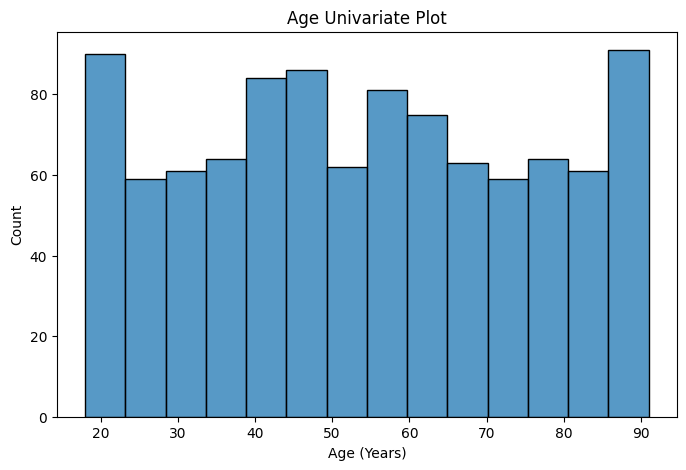

In [23]:
import matplotlib.pyplot as plt

# Creates a sized box to input the plot
fig1 = plt.figure(figsize = (8,5))
# Specifies what should be included in the plot
age_plot = sns.histplot(age_column, bins = bin_num)

# Gives the plot the quoted title
plt.title("Age Univariate Plot")

# Prints the quoted statement
print("The required amount of bins for a bin_width of 5 is 14")

### 2b
Dependants, fixing data errors wirh seaborn itself

In [24]:
# Checks he total number of N/A cells in the dependants column
df["Dependants"].isna().sum()

np.int64(19)

In [25]:
# Fill up the empty cells with 0
df["Dependants"] = df["Dependants"].fillna(0)

In [26]:
# Checks again for confirmation
df["Dependants"].isna().sum()

np.int64(0)

<function matplotlib.pyplot.show(close=None, block=None)>

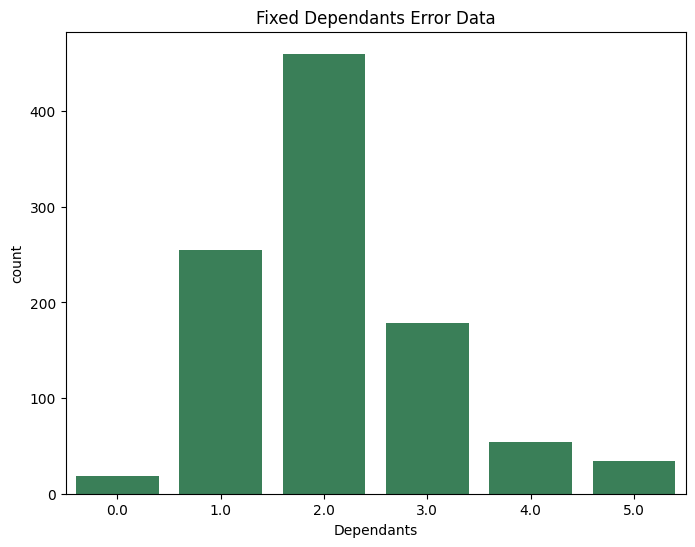

In [27]:
# Creates a sized box to input the plot
fig2 = plt.figure(figsize = (8,6))
# Specifies what should be included in the plot
fixed_dep_error = sns.countplot(data = df, x = "Dependants", color = "seagreen")
# Gives the plot the quoted title
plt.title("Fixed Dependants Error Data")
# Shows plot
plt.show

### 2c
Age(of default bins), conditioned on Marital Status

<Figure size 800x600 with 0 Axes>

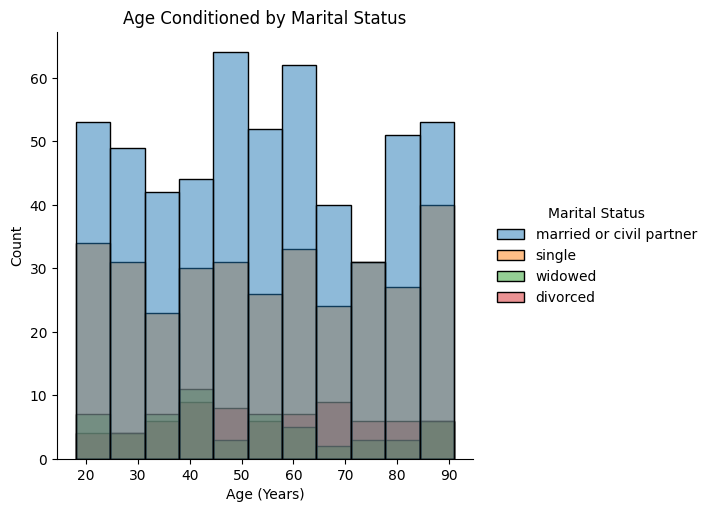

In [28]:
# Creates a sized box to input the plot
fig3 = plt.figure(figsize = (8,6))
# Specifies what should be included in the plot
age_con_by_MStatus = sns.displot(data =df, x = "Age (Years)", bins = "auto" , hue = "Marital Status")
# Gives the plot the quoted title
plt.title("Age Conditioned by Marital Status")
# Shows plot
plt.show()


## Solution 3
Multivariate plots will be performed on the following data attributes

In [29]:
df["Age (Years)"].isna().sum()

np.int64(0)

In [30]:
df["Distance Commuted to Work (Km)"].isna().sum()

np.int64(0)

In [31]:
df["Dependants"].isna().sum()

np.int64(0)

### 3a
Commuted distance against salary

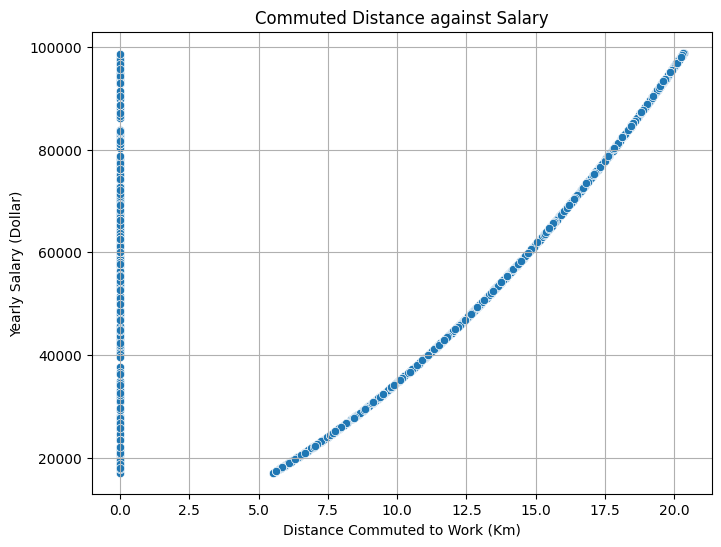

In [32]:
# Creates a sized box to input the plot
fig4 = plt.figure(figsize = (8,6))
# Specifies what should be included in the plot
Commute_Dist_Salary = sns.scatterplot(data =df, x = "Distance Commuted to Work (Km)", y = "Yearly Salary (Dollar)")
# Gives the plot the quoted title
plt.title("Commuted Distance against Salary")
# Gives plot a patterned view to know cross points
plt.grid()

### 3b
Age against Salary

Text(0.5, 1.0, 'Age against Salary')

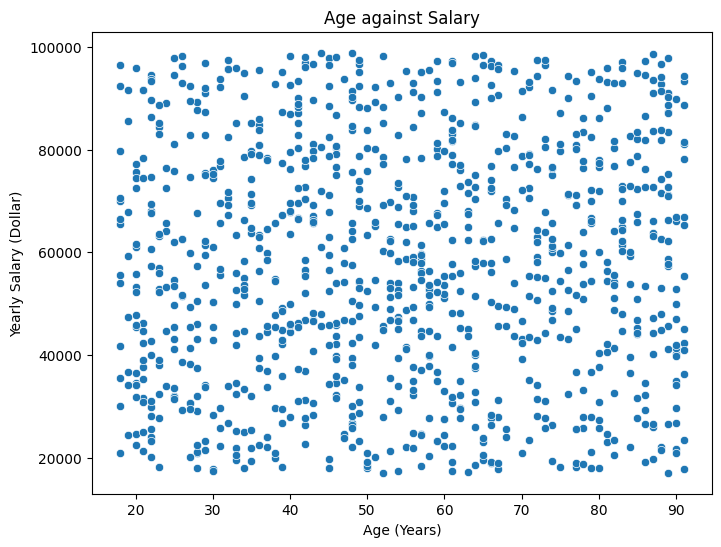

In [33]:
# Creates a sized box to input the plot
fig5 = plt.figure(figsize = (8,6))
# Specifies what should be included in the plot
age_salary = sns.scatterplot(data =df, x = "Age (Years)", y = "Yearly Salary (Dollar)")
# Gives the plot the quoted title
plt.title("Age against Salary")

### 3c
Age against Salary conditioned by Dependants

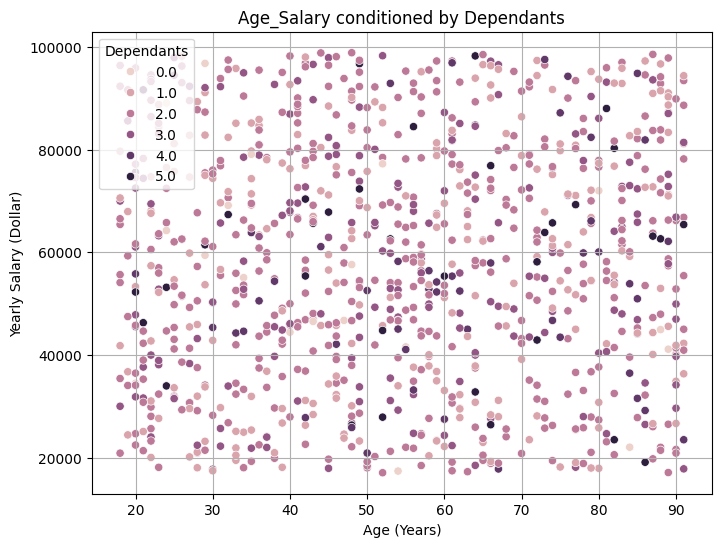

In [34]:
# Creates a sized box to input the plot
fig6 = plt.figure(figsize = (8,6))
# Specifies what should be included in the plot
age_salary_Condepts = sns.scatterplot(data =df, x = "Age (Years)", y = "Yearly Salary (Dollar)", hue = "Dependants")
# Gives the plot the quoted title
plt.title("Age_Salary conditioned by Dependants")
# Gives plot a patterned view to know cross points
plt.grid()
# Shows plot
plt.show()

## Solution 4
A notebook cell to save plots will be provided below, as client would like the ability to save output plots

In [35]:
# Saves all above plot figures on same file path as the notebook
fig1.savefig("Age Univariate Plot.png")
fig2.savefig("Fixed Dependants Error Data.png")
age_con_by_MStatus.fig.savefig("Age Conditioned by Marital Status.png")
fig4.savefig("Commuted Distance against Salary.png")
fig5.savefig("Age against Salary.png")
fig6.savefig("Age_Salary conditioned by Dependants.png")